# Demo

## A simple start:

The user can simply pass the path of the file that he/she wants the model to learn the pattern of and leave everything as default

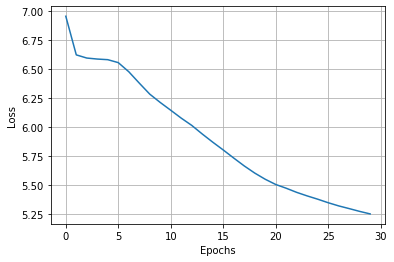

In [8]:
from NLP.src.generator import generator
g = generator.Generator('sample_txt.txt')

You can see how good your model performs by looking at the loss plot above, a low loss at the end is a good sign

After that, we can generate fake sentences by passing the word/phrase that you want the fake sentence to begin with and how many words you want it to generate

In [2]:
g.decode('he, is', output_length=10)

'he is have fairbanks skies man could the teacups in not the'

## Better model and better training

We can improve the model performance by letting it run more training epochs, that of course, takes time:

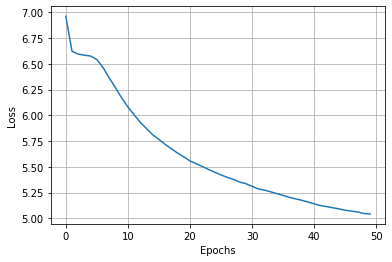

In [6]:
g = generator.Generator('sample_txt.txt', epoch=50)

Or, we can change the training parameters, such as the learning rate, a high lr will cause faster initial progress but it won't get you very far

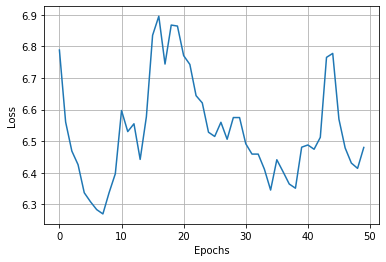

In [7]:
g = generator.Generator('sample_txt.txt', epoch=50, lr=10)

There are some more parameters that you can customize:
    
#### Model structure parameters:
    
    rnn_type: type of RNN used, 'gru', 'lstm', 'rnn_relu' or 'rnn_tanh'
    num_embed: embedding dimension
    num_hidden: RNN hidden layer dimension
    num_layers: number of RNN layers
    dropout: between 0 and 1, dropout probability
    use_pretrained_embedding: use pretrained GloVe embeddings to initialize the input embedding layer
    freeze_embedding: freeze training of embedding layers (input and output). Only do this when use_pretrained_embedding=True!
    tie_weights: tie weights on input and output embedding layers
#### Training parameters:
    epoch: number of epochs for model training
    lr: learning rate of sgd (current version defaults to sgd trainer)
    
#### Other
    batch_size: batch size
    context: cpu (default) or gpu
    

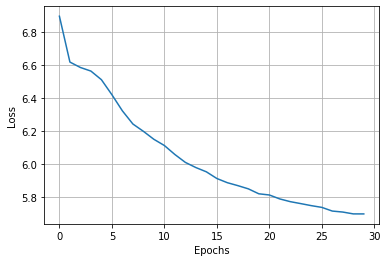

In [10]:
g = generator.Generator('sample_txt.txt', epoch=30, rnn_type='lstm', num_embed=5,
                 num_hidden=5, num_layers=2, dropout=0.1, lr=1, batch_size=16)

## Decoder options

You can also specify how you would like your decoder to work, for example, you can have it plot the top K most probable next word for your input word/sequence.

In the example below, we ask it to show the 10 most probable words following 'he is'

'he is sharing distribution electronic work poems have you or prepare must'

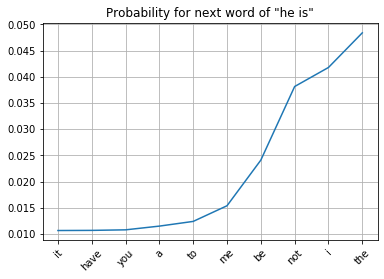

In [12]:
g.decode('he is', output_length=10, get_next_probability=True, get_next_probability_count=10)

We can also let the decoder sample N sequences and automatically choose the one that it thinks is the most likely one, by setting decoder_mode to 'sample'.

Below we let it sample 20 sequences:

In [19]:
g.decode('he, is', output_length=10, decoder_mode='sample', sample_count=20)

'he is provided in after some christi of a full project of'

# Advanced options

## Embedding layer options:

### Pre-trained embeddings

In addition to the RNN layers, the model needs a word embedding (technically, two embeddings, one on input side and one on output side). The model learns this automatically.

However, it's sometimes beneficial to initialize these embeddings using pre-learned embeddings, such as Wrd2Vec/GloVe model trained on a much larger space. Our class provides such capability. 

By setting use_pretrained_embedding=True, the input embedding will be initialized to the embedding glove-twitter-25 (25 dimensional embedding trained on Twitter data, using GloVe model). 

#### Warning: The pre-trained embedding can be large (>500MB) and it will take a while to load

Start downloading pre-trained vectors, this will take some time
Pre-trained vectors downloading complete


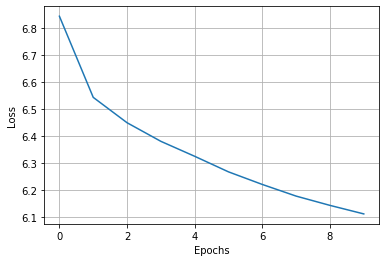

In [4]:
g = generator.Generator('sample_txt.txt', epoch=10, lr=1, batch_size=32, use_pretrained_embedding=True)

### Tie embedding layers

User can choose to use the same embedding for output side by setting tie_weights=True. This can always be used whether or not you are using pre-trained embeddings and it can provide better or worse performance on different dataset.

Below we tie the weights and see how it provides better loss performance on the dataset

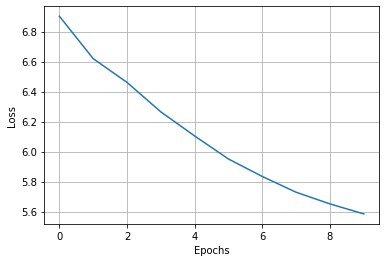

In [5]:
g = generator.Generator('sample_txt.txt', epoch=10, lr=1, batch_size=32, tie_weights=True)

### Freeze embedding

User can choose to freeze embedding layers so the weights do not get updated during training. 

#### Warning: This is only useful when using pretrained use_pretrained_embedding=True and tie_weights=True

Start downloading pre-trained vectors, this will take some time
Pre-trained vectors downloading complete


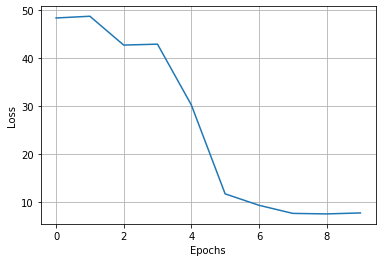

In [7]:
g = generator.Generator('sample_txt.txt', epoch=10, lr=1, batch_size=32, use_pretrained_embedding=True, 
                       freeze_embedding=True, tie_weights=True)